In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [15]:
%matplotlib inline
import matplotlib.pyplot as py

In [6]:
data=pd.read_csv("HR-Employee-Attrition.csv")

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
data.shape

(1470, 35)

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
data['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

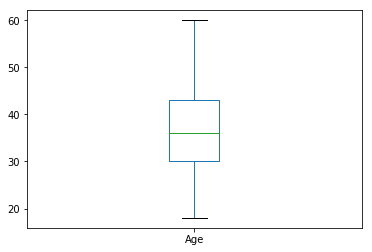

In [16]:
data['Age'].plot(kind='box')

In [17]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [20]:
data['DailyRate'].nunique()

886

In [21]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [22]:
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [23]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
data['Attrition'].replace({'Yes':1,'No':0},inplace=True)

In [26]:
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [28]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [29]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

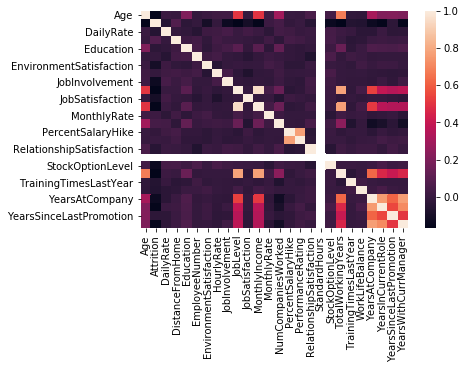

In [41]:
sns.heatmap(data.corr())

In [38]:
data.corr().T

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [34]:
data.drop(columns={'EmployeeCount'},inplace=True)

In [43]:
data.drop(columns={'StandardHours','Over18','EmployeeNumber','StockOptionLevel','MonthlyIncome'},inplace=True)

In [44]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [45]:
cat_col=data.select_dtypes(exclude=np.number)

In [46]:
num_col=data.select_dtypes(include=np.number)

In [50]:
cat_col_processed=pd.get_dummies(cat_col)


In [52]:
data_new=pd.concat([cat_col_processed,num_col],axis='columns')

In [57]:
X=data_new.drop(columns={'Attrition'})

In [58]:
y=data_new['Attrition']

In [59]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=8)

In [64]:
test_y.shape

(441,)

In [65]:
log=LogisticRegression()

In [104]:
log.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
train_pred=log.predict(train_X)

In [69]:
test_pred=log.predict(test_X)

In [70]:
print("accuracy score for train:")
print(accuracy_score(train_y,train_pred))

accuracy score for train:
0.8969873663751214


In [71]:
print("accuracy score for test:")
print(accuracy_score(test_y,test_pred))

accuracy score for test:
0.891156462585034


In [78]:
def model_selection(model,X,y):
    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=8)
    model.fit(train_X,train_y)
    train_pred=model.predict(train_X)
    test_pred=model.predict(test_X)
    
    print("accuracy score for train:")
    print(accuracy_score(train_y,train_pred))
    
    print("accuracy score for test:")
    print(accuracy_score(test_y,test_pred))
    
    print("Classification Report for test:")
    print(classification_report(test_y,test_pred))


In [79]:
model_selection(log,X,y)

accuracy score for train:
0.8969873663751214
accuracy score for test:
0.891156462585034
Classification Report for test:
             precision    recall  f1-score   support

          0       0.89      0.99      0.94       371
          1       0.84      0.39      0.53        70

avg / total       0.89      0.89      0.87       441



In [81]:
std=StandardScaler()
X_std=std.fit_transform(X)

In [82]:
model_selection(log,X_std,y)

accuracy score for train:
0.8979591836734694
accuracy score for test:
0.873015873015873
Classification Report for test:
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       371
          1       0.68      0.39      0.49        70

avg / total       0.86      0.87      0.86       441



In [83]:
nor=MinMaxScaler()
X_nor=nor.fit_transform(X)

In [85]:
model_selection(log,X_nor,y)

accuracy score for train:
0.8950437317784257
accuracy score for test:
0.8707482993197279
Classification Report for test:
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       371
          1       0.72      0.30      0.42        70

avg / total       0.86      0.87      0.85       441



In [101]:
knn=KNeighborsClassifier(n_neighbors=5)

In [102]:
model_selection(knn,X,y)

accuracy score for train:
0.8483965014577259
accuracy score for test:
0.8095238095238095
Classification Report for test:
             precision    recall  f1-score   support

          0       0.84      0.95      0.89       371
          1       0.21      0.07      0.11        70

avg / total       0.74      0.81      0.77       441



In [93]:
nb=GaussianNB()

In [94]:
model_selection(nb,X,y)

accuracy score for train:
0.7619047619047619
accuracy score for test:
0.7619047619047619
Classification Report for test:
             precision    recall  f1-score   support

          0       0.92      0.78      0.85       371
          1       0.36      0.64      0.46        70

avg / total       0.83      0.76      0.79       441



In [95]:
log=LogisticRegression()

In [107]:

test_pred_proba=log.predict_proba(test_X)

In [112]:
test_pred_proba

array([[9.99523343e-01, 4.76656626e-04],
       [9.53747400e-01, 4.62526005e-02],
       [9.63908109e-01, 3.60918911e-02],
       [5.92044442e-01, 4.07955558e-01],
       [3.04844329e-01, 6.95155671e-01],
       [9.59008129e-01, 4.09918713e-02],
       [9.52107215e-01, 4.78927854e-02],
       [7.76745022e-01, 2.23254978e-01],
       [8.66562962e-01, 1.33437038e-01],
       [9.55986096e-01, 4.40139040e-02],
       [9.94477690e-01, 5.52230979e-03],
       [9.55640409e-01, 4.43595906e-02],
       [9.52780166e-01, 4.72198344e-02],
       [8.66749477e-01, 1.33250523e-01],
       [9.43966281e-01, 5.60337192e-02],
       [5.63997568e-01, 4.36002432e-01],
       [9.96758689e-01, 3.24131147e-03],
       [8.37240492e-01, 1.62759508e-01],
       [7.22836710e-01, 2.77163290e-01],
       [9.91438485e-01, 8.56151539e-03],
       [9.23189206e-01, 7.68107937e-02],
       [9.06003103e-01, 9.39968968e-02],
       [9.99292863e-01, 7.07136583e-04],
       [9.82228059e-01, 1.77719408e-02],
       [5.099728

In [115]:
test_pred_val=np.where(test_pred_proba[:,1]>0.1,1,0)

In [116]:
accuracy_score(test_y,test_pred_val)

0.6870748299319728